<IPython.core.display.Javascript object>


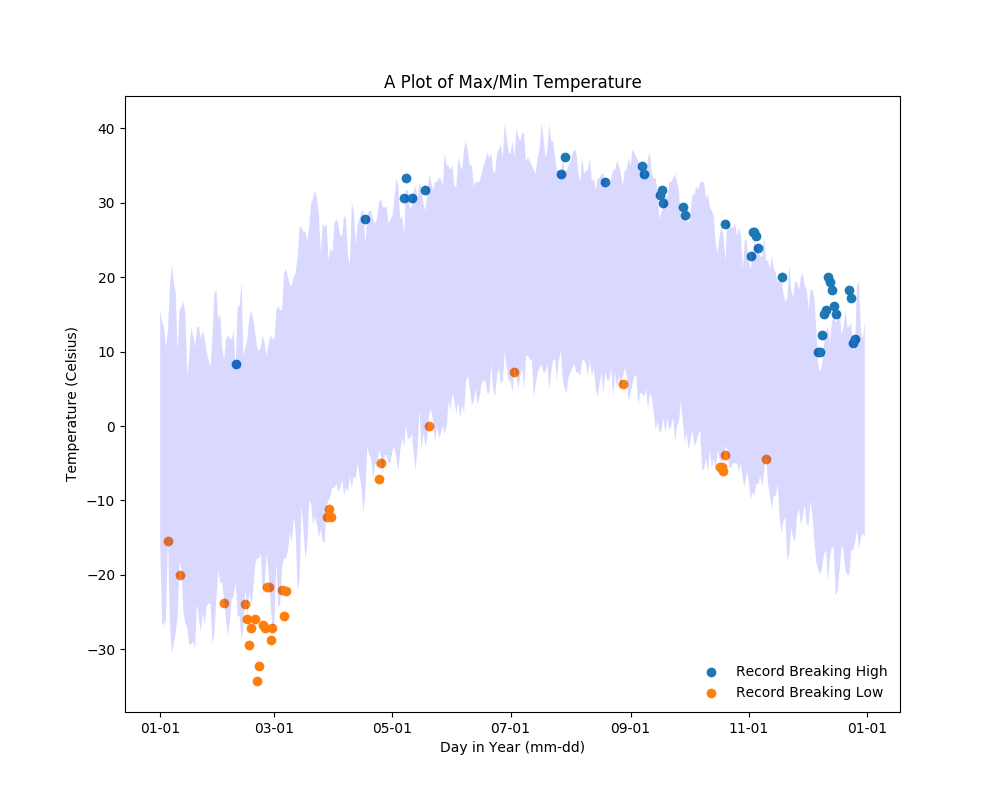

In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import figure

%matplotlib notebook

df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df=df[df['Date'].str.contains('02-29')==False]
df['year'] = pd.DatetimeIndex(df['Date']).year
df['day']=pd.DatetimeIndex(df['Date']).day
df['day'] = df['day'].apply(str)
df['month']=pd.DatetimeIndex(df['Date']).month
df['month']=df['month'].apply(str)
df['monthday']=df['month']+'-'+df['day']
df=df.sort_values('Date')
df.drop(df.index[df['year'] == 2015], inplace=True)
maxser=df.groupby('monthday', sort=False)['Data_Value'].max()
minser=df.groupby('monthday', sort=False)['Data_Value'].min()
maxdata=np.array(maxser)/10
mindata=np.array(minser)/10

df1=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['day']=pd.DatetimeIndex(df1['Date']).day
df1['day'] = df1['day'].apply(str)
df1['month']=pd.DatetimeIndex(df1['Date']).month
df1['month']=df1['month'].apply(str)
df1['monthday']=df1['month']+'-'+df1['day']
df1=df1.sort_values('Date')

df1=df1[df1['year']==2015].sort_values('Date')
maxser2015=df1.groupby('monthday', sort=False)['Data_Value'].max()
minser2015=df1.groupby('monthday', sort=False)['Data_Value'].min()
maxdata2015=np.array(maxser2015)
mindata2015=np.array(minser2015)

new_df=pd.DataFrame({'Max': maxser})
new_df['Min']=minser
new_df['Max2015']=maxser2015
new_df['Min2015']=minser2015

new_df['breakmax']=new_df.query('Max2015>Max')['Max2015']
new_df['breakmin']=new_df.query('Min2015<Min')['Min2015']

maxdata2015=np.array(new_df['breakmax'])/10
mindata2015=np.array(new_df['breakmin'])/10

dates = np.arange('2017-01-01', '2018-01-01', dtype='datetime64[D]')

plt.figure(figsize=(10,8))
plt.plot(dates,maxdata,linestyle='None')
plt.plot(dates,mindata,linestyle='None')
plt.scatter(dates,maxdata2015,label='Record Breaking High')
plt.scatter(dates,mindata2015,label='Record Breaking Low')

date_form = DateFormatter("%m-%d")
ax = plt.gca()
ax.xaxis.set_major_formatter(date_form)


plt.gca().fill_between(dates, 
                       maxdata, mindata, 
                       facecolor='blue', 
                       alpha=0.15)

plt.xlabel('Day in Year (mm-dd)')
plt.ylabel('Temperature (Celsius)')
plt.title('A Plot of Max/Min Temperature')

plt.legend(loc=4,frameon=False)

plt.savefig('asmt2.png')